In [1]:
'''
Objective:
The objective of this assignment is to apply Decision Tree Classification to a given dataset, analyse the performance of the model, and interpret the 
results.
Tasks:
1. Data Preparation:
Load the dataset into your preferred data analysis environment (e.g., Python with libraries like Pandas and NumPy).
2. Exploratory Data Analysis (EDA):
Perform exploratory data analysis to understand the structure of the dataset.
Check for missing values, outliers, and inconsistencies in the data.
Visualize the distribution of features, including histograms, box plots, and correlation matrices.
3. Feature Engineering:
If necessary, perform feature engineering techniques such as encoding categorical variables, scaling numerical features, or handling missing values.
4. Decision Tree Classification:
Split the dataset into training and testing sets (e.g., using an 80-20 split).
Implement a Decision Tree Classification model using a library like scikit-learn.
Train the model on the training set and evaluate its performance on the testing set using appropriate evaluation metrics (e.g., accuracy, precision, 
recall, F1-score, ROC-AUC).
5. Hyperparameter Tuning:
Perform hyperparameter tuning to optimize the Decision Tree model. Experiment with different hyperparameters such as maximum depth, minimum samples 
split, and criterion.
6. Model Evaluation and Analysis:
Analyse the performance of the Decision Tree model using the evaluation metrics obtained.
Visualize the decision tree structure to understand the rules learned by the model and identify important features
Interview Questions:
1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?
2. What is the difference between the Label encoding and One-hot encoding?
'''

"\nObjective:\nThe objective of this assignment is to apply Decision Tree Classification to a given dataset, analyse the performance of the model, and interpret the \nresults.\nTasks:\n1. Data Preparation:\nLoad the dataset into your preferred data analysis environment (e.g., Python with libraries like Pandas and NumPy).\n2. Exploratory Data Analysis (EDA):\nPerform exploratory data analysis to understand the structure of the dataset.\nCheck for missing values, outliers, and inconsistencies in the data.\nVisualize the distribution of features, including histograms, box plots, and correlation matrices.\n3. Feature Engineering:\nIf necessary, perform feature engineering techniques such as encoding categorical variables, scaling numerical features, or handling missing values.\n4. Decision Tree Classification:\nSplit the dataset into training and testing sets (e.g., using an 80-20 split).\nImplement a Decision Tree Classification model using a library like scikit-learn.\nTrain the model on

In [2]:
#1. Data Preparation:
#Load the dataset into your preferred data analysis environment (e.g., Python with libraries like Pandas and NumPy).
import pandas as pd
df = pd.read_csv("C:\\Users\\sujey\\Downloads\\Assignments\\Decision Tree\\Decision Tree\\heart_disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,fixed defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,normal,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,fixed defect,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,True,NaN,downsloping,reversable defect,4


In [3]:
'''
2. Exploratory Data Analysis (EDA):
Perform exploratory data analysis to understand the structure of the dataset.
Check for missing values, outliers, and inconsistencies in the data.
Visualize the distribution of features, including histograms, box plots, and correlation matrices.
'''

'\n2. Exploratory Data Analysis (EDA):\nPerform exploratory data analysis to understand the structure of the dataset.\nCheck for missing values, outliers, and inconsistencies in the data.\nVisualize the distribution of features, including histograms, box plots, and correlation matrices.\n'

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    bool   
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(2), float64(1), int64(5), object(5)
memory usage: 79.9+ KB


In [5]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [6]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [7]:
df["oldpeak"].fillna(df["oldpeak"].median(),inplace=True)

C:\Users\sujey\AppData\Local\Temp\ipykernel_14604\3397919899.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["oldpeak"].fillna(df["oldpeak"].median(),inplace=True)


In [8]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

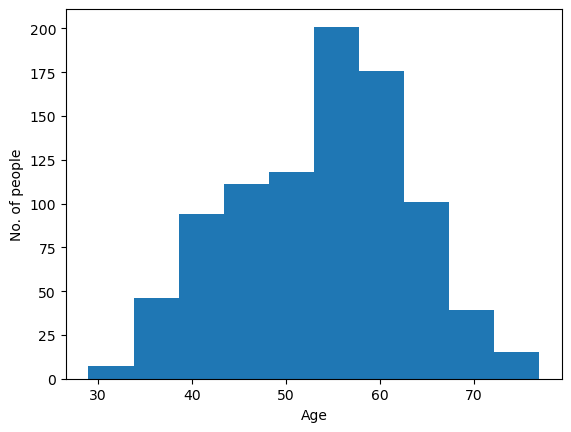

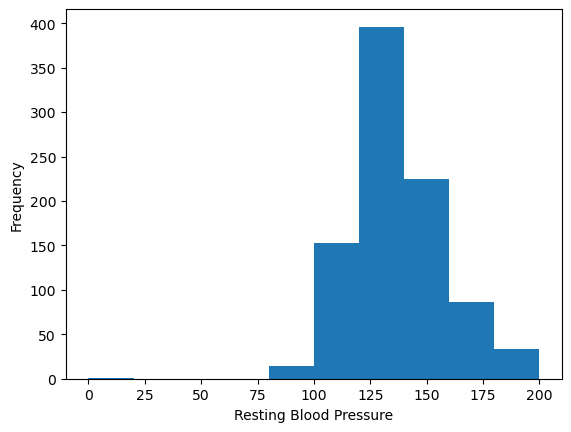

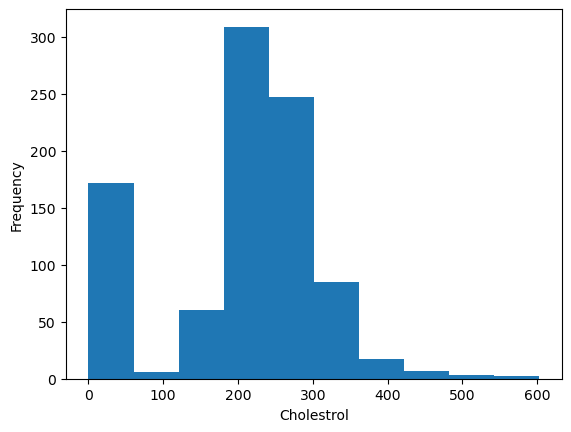

In [9]:
import matplotlib.pyplot as plt
plt.hist(df["age"])
plt.xlabel("Age")
plt.ylabel("No. of people")
plt.show()

plt.hist(df["trestbps"])
plt.xlabel("Resting Blood Pressure")
plt.ylabel("Frequency")
plt.show()

plt.hist(df["chol"])
plt.xlabel("Cholestrol")
plt.ylabel("Frequency")
plt.show()

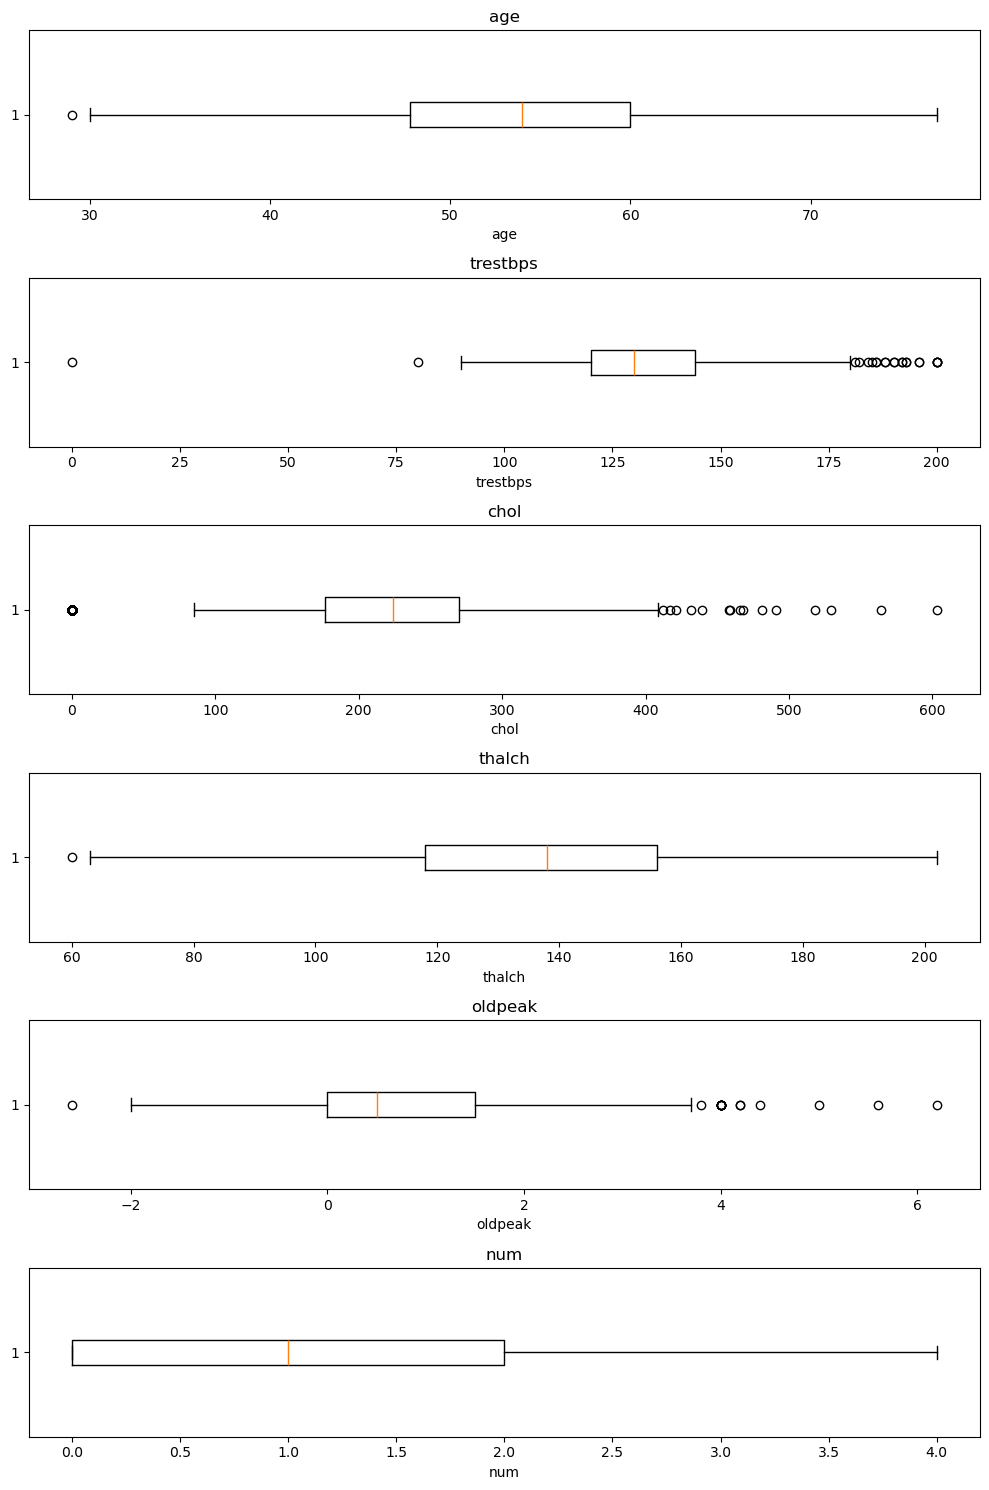

In [10]:
numerical_cols = df.select_dtypes(include=['number']).columns

# Create box plots for each numerical column in a horizontal manner
plt.figure(figsize=(10, 15))
for i, col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols), 1, i + 1)
    plt.boxplot(df[col], vert=False)
    plt.title(col)
    plt.xlabel(col)

plt.tight_layout()
plt.show()

In [11]:
correlation_matrix = df[numerical_cols].corr()
correlation_matrix

,age,trestbps,chol,thalch,oldpeak,num
age,1.000000,0.253999,-0.099967,-0.328088,0.217942,0.326493
trestbps,0.253999,1.000000,0.117488,-0.133360,0.134945,0.137251
chol,-0.099967,0.117488,1.000000,0.197907,0.032205,-0.238813
thalch,-0.328088,-0.133360,0.197907,1.000000,-0.112624,-0.323058
oldpeak,0.217942,0.134945,0.032205,-0.112624,1.000000,0.406078
num,0.326493,0.137251,-0.238813,-0.323058,0.406078,1.000000


In [12]:
#3. Feature Engineering:
#If necessary, perform feature engineering techniques such as encoding categorical variables, scaling numerical features, or handling missing values.

In [13]:
#split the X variables
X = df[["age","chol","thalch","oldpeak"]] # dropping trestbps as its weakly correlated with num
Y = df["num"]

In [14]:
#Standardization
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
SS_X = SS.fit_transform(X)
SS_X = pd.DataFrame(SS_X)
SS_X.columns = list(X)
SS_X.head()

,age,chol,thalch,oldpeak
0,1.006027,0.281297,0.524183,1.354403
1,-1.397560,0.013526,-0.147705,-0.815718
2,0.350503,-0.084656,0.449529,-0.438305
3,-0.195767,-0.138211,2.017268,-0.815718
4,0.350503,-0.004325,-0.371668,0.599578


In [15]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df["sex"] = LE.fit_transform(df["sex"])
df["cp"] = LE.fit_transform(df["cp"])
df["restecg"] = LE.fit_transform(df["restecg"])
df["slope"] = LE.fit_transform(df["slope"])
df["thal"] = LE.fit_transform(df["thal"])
df_label = df[["sex","cp","restecg","slope","thal"]]
df_label

,sex,cp,restecg,slope,thal
0,1,3,0,0,0
1,1,1,1,1,0
2,1,0,1,1,0
3,1,3,0,1,0
4,1,0,1,1,0
...,...,...,...,...,...
903,1,0,1,2,0
904,1,0,2,1,1
905,1,2,0,0,0
906,1,2,2,0,2


In [16]:
df["exang"] = df["exang"].astype(int)
df["fbs"] = df["fbs"].astype(int)

In [17]:
df_new = pd.concat([SS_X,df["exang"],df["fbs"],df_label,df["num"]],axis=1)
df_new

,age,chol,thalch,oldpeak,exang,fbs,sex,cp,restecg,slope,thal,num
0,1.006027,0.281297,0.524183,1.354403,0,1,1,3,0,0,0,0
1,-1.397560,0.013526,-0.147705,-0.815718,0,0,1,1,1,1,0,0
2,0.350503,-0.084656,0.449529,-0.438305,0,0,1,0,1,1,0,0
3,-0.195767,-0.138211,2.017268,-0.815718,0,0,1,3,0,1,0,0
4,0.350503,-0.004325,-0.371668,0.599578,1,0,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
903,-0.086513,-1.798388,-0.595631,0.599578,0,0,1,0,1,2,0,4
904,0.896773,-0.281021,-0.595631,2.014874,1,0,1,0,2,1,1,4
905,0.241249,-1.798388,-0.483649,1.543109,1,0,1,2,0,0,0,4
906,0.241249,0.058155,-1.155538,-0.343952,1,1,1,2,2,0,2,4


In [18]:
'''
4. Decision Tree Classification:
Split the dataset into training and testing sets (e.g., using an 80-20 split).
Implement a Decision Tree Classification model using a library like scikit-learn.
Train the model on the training set and evaluate its performance on the testing set using appropriate evaluation metrics (e.g., accuracy, precision, 
recall, F1-score, ROC-AUC).
'''

'\n4. Decision Tree Classification:\nSplit the dataset into training and testing sets (e.g., using an 80-20 split).\nImplement a Decision Tree Classification model using a library like scikit-learn.\nTrain the model on the training set and evaluate its performance on the testing set using appropriate evaluation metrics (e.g., accuracy, precision, \nrecall, F1-score, ROC-AUC).\n'

In [19]:
#Split the variables
X = df_new.drop("num",axis=1)
Y = df_new["num"]
X.head()

,age,chol,thalch,oldpeak,exang,fbs,sex,cp,restecg,slope,thal
0,1.006027,0.281297,0.524183,1.354403,0,1,1,3,0,0,0
1,-1.397560,0.013526,-0.147705,-0.815718,0,0,1,1,1,1,0
2,0.350503,-0.084656,0.449529,-0.438305,0,0,1,0,1,1,0
3,-0.195767,-0.138211,2.017268,-0.815718,0,0,1,3,0,1,0
4,0.350503,-0.004325,-0.371668,0.599578,1,0,1,0,1,1,0


In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state = 100,test_size = 0.2,stratify=Y)

In [21]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion="gini",max_depth=6,min_samples_split=10,min_samples_leaf=5,class_weight='balanced',random_state=100)
model.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6, min_samples_leaf=5,
                       min_samples_split=10, random_state=100)

In [22]:
Y_pred_test = model.predict(X_test)

In [23]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
test_score = accuracy_score(Y_test,Y_pred_test)
prec_score = precision_score(Y_test,Y_pred_test,average='micro')
recall = recall_score(Y_test,Y_pred_test,average='micro')
f1 = f1_score(Y_test,Y_pred_test,average='micro')
print("Testing accuracy:",round(test_score,2))
print("Precision score:",round(prec_score,2))
print("Recall score:",round(recall,2))
print("F1 score:",round(f1,2))

Testing accuracy: 0.43
Precision score: 0.43
Recall score: 0.43
F1 score: 0.43


In [24]:
#Using cross validation
import numpy as np
test_scores = []
prec_scores = []
recall = []
f1 = []
for i in range(0,501):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state = i,test_size = 0.2,stratify=Y)
    model = DecisionTreeClassifier(criterion="gini",max_depth=7)
    model.fit(X_train,Y_train)
    test_scores.append(accuracy_score(Y_test,Y_pred_test))
    prec_scores.append(precision_score(Y_test,Y_pred_test,average='micro'))
    recall.append(precision_score(Y_test,Y_pred_test,average='micro'))
    f1.append(precision_score(Y_test,Y_pred_test,average='micro'))
print("CV - Testing accuracy:",round(np.mean(test_scores),2))
print("CV - Precision score:",round(np.mean(prec_scores),2))
print("CV - Recall score:",round(np.mean(recall),2))
print("CV - F1 score:",round(np.mean(f1),2))  

CV - Testing accuracy: 0.25
CV - Precision score: 0.25
CV - Recall score: 0.25
CV - F1 score: 0.25


In [25]:
'''
Interview Questions:
1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?
Ans) 
Max_depth: 
This hyperparameter controls the maximum depth (number of levels) the tree can grow.
Effect: A higher max_depth allows the tree to capture more complex patterns in the training data, potentially leading to lower training error but 
increasing the risk of overfitting. A lower max_depth can prevent overfitting but may lead to underfitting if the model cannot capture sufficient 
patterns. 

min_samples_split:
This defines the minimum number of samples required to split an internal node. 
Effect: Increasing min_samples_split can prevent the model from learning overly specific patterns from small subsets of data, thus reducing overfitting 
and increasing generalization. Conversely, a lower value allows for more fine-grained splits, potentially leading to overfitting.

min_samples_leaf:
This specifies the minimum number of samples required to be at a leaf node. 
Effect: Similar to min_samples_split, increasing min_samples_leaf helps smooth the model and reduce the impact of noise by ensuring that leaf nodes 
represent a sufficient number of samples, thereby preventing overfitting.

max_features:
This limits the number of features considered when looking for the best split at each node.
Effect: Especially useful in high-dimensional datasets, max_features can reduce variance by limiting the number of features considered at each split, 
potentially improving generalization and reducing training time.

criterion:
This determines the function used to measure the quality of a split, commonly Gini impurity or information gain (entropy).
Effect: The choice of criterion can influence how the tree prioritizes splits and ultimately the structure of the tree, potentially affecting accuracy 
and generalization.

2. What is the difference between the Label encoding and One-hot encoding?
Ans)
Label encoding assigns a unique integer to each category, while one-hot encoding creates a binary vector for each category, with a 1 indicating the 
presence of the category and 0s for the rest
'''

"\nInterview Questions:\n1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?\nAns) \nMax_depth: \nThis hyperparameter controls the maximum depth (number of levels) the tree can grow.\nEffect: A higher max_depth allows the tree to capture more complex patterns in the training data, potentially leading to lower training error but \nincreasing the risk of overfitting. A lower max_depth can prevent overfitting but may lead to underfitting if the model cannot capture sufficient \npatterns. \n\nmin_samples_split:\nThis defines the minimum number of samples required to split an internal node. \nEffect: Increasing min_samples_split can prevent the model from learning overly specific patterns from small subsets of data, thus reducing overfitting \nand increasing generalization. Conversely, a lower value allows for more fine-grained splits, potentially leading to overfitting.\n\nmin_samples_leaf:\nThis specifies the minimum number of s